## Uniform Interpolatoin

In [1]:
import Pkg; 

Pkg.add("DataInterpolations")
Pkg.add("QuadGK")
Pkg.add("Roots")
Pkg.add("Distributions")


using DataInterpolations
using Plots

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [2]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

In [3]:
f(x) = 1 / (1 + x^2)
n_values = [5, 10, 20, 40]

4-element Vector{Int64}:
  5
 10
 20
 40

In [4]:
polynomials = []

for n in n_values
    x_nodes = LinRange(-5, 5, n + 1) |> collect
    y_nodes = f.(x_nodes)
    
    P = LagrangeInterpolation(y_nodes, x_nodes)
    
    push!(polynomials, P)
end

P5 = polynomials[1]
P10 = polynomials[2]
P20 = polynomials[3]
P40 = polynomials[4]

println("===============================")
println("n = 5")
println("Nodes: ", P5.t)
println("Values: ", P5.u)
println()

println("===============================")
println("n = 10")
println("Nodes: ", P10.t)
println("Values: ", P10.u)
println()

println("===============================")
println("n = 20")
println("Nodes: ", P20.t)
println("Values: ", P20.u)
println()

println("===============================")
println("n = 40")
println("Nodes: ", P40.t)
println("Values: ", P40.u)
println()

n = 5
Nodes: [-5.0, -3.0, -1.0, 1.0, 3.0, 5.0]
Values: [0.038461538461538464, 0.1, 0.5, 0.5, 0.1, 0.038461538461538464]

n = 10
Nodes: [-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 1.9999999999999998, 3.0, 4.0, 5.0]
Values: [0.038461538461538464, 0.058823529411764705, 0.1, 0.2, 0.5, 1.0, 0.5, 0.20000000000000004, 0.1, 0.058823529411764705, 0.038461538461538464]

n = 20
Nodes: [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 1.9999999999999998, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
Values: [0.038461538461538464, 0.047058823529411764, 0.058823529411764705, 0.07547169811320754, 0.1, 0.13793103448275862, 0.2, 0.3076923076923077, 0.5, 0.8, 1.0, 0.8, 0.5, 0.3076923076923077, 0.20000000000000004, 0.13793103448275862, 0.1, 0.07547169811320754, 0.058823529411764705, 0.047058823529411764, 0.038461538461538464]

n = 40
Nodes: [-5.0, -4.75, -4.5, -4.25, -4.0, -3.75, -3.5, -3.25, -3.0, -2.75, -2.5, -2.25, -2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1

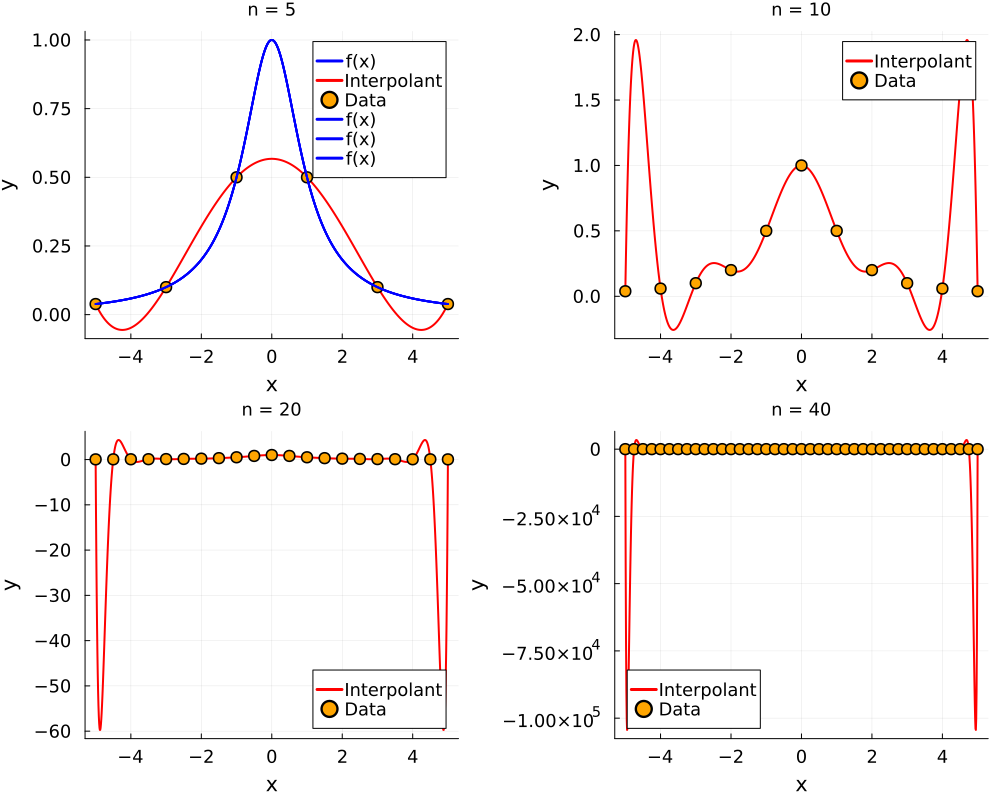

In [5]:
p1 = plot()
p2 = plot()
p3 = plot()
p4 = plot()
plots_array = [p1, p2, p3, p4]

for (i, n) in enumerate(n_values)
    x_nodes = LinRange(-5, 5, n + 1)
    y_nodes = f.(x_nodes)
    
    p = LagrangeInterpolation(y_nodes, x_nodes)
    
    xx = LinRange(-5, 5, 1000)
    
    plot!(p1, xx, f.(xx), label="f(x)", linewidth=2, color=:blue)
    plot!(plots_array[i], xx, p.(xx), label="Interpolant", linewidth=2, color=:red)
    scatter!(plots_array[i], x_nodes, y_nodes, label="Data", color=:orange)
    xlabel!(plots_array[i], "x")
    ylabel!(plots_array[i], "y")
    title!(plots_array[i], "n = $n")
end

plot(plots_array..., layout=(2, 2), size=(1000, 800))

lagrange interpolating polynomials

In [6]:
q = 1 + sqrt(10)
val = f(q)

errors = []

for n in n_values
    x_nodes = LinRange(-5, 5, n + 1)
    y_nodes = f.(x_nodes)
    
    P = LagrangeInterpolation(y_nodes, x_nodes)
    
    P_q = P(q)
    
    error = abs(val - P_q)
    push!(errors, error)
    
    println("n = $n:")
    println("error: $error")
    println()
end

n = 5:
error: 0.10946345746736696

n = 10:
error: 0.3937632288282632

n = 20:
error: 2.009273490741189

n = 40:
error: 19.006603001851857



as n increases, we have some serious overfitting. The absolute error is actually increasing rather than decreasing. This is what makes Lagrange kind of dangerous.

## Chebyshev Interpolation

In [7]:
function getChebyshevNode(n, j)
    ret = 5 * cos( ((2j + 1) * pi) / (2n + 2))
    return ret
end

getChebyshevNode (generic function with 1 method)

4.8296291314453415
3.5355339059327378
1.2940952255126037
-1.2940952255126033
-3.5355339059327373
-4.829629131445341


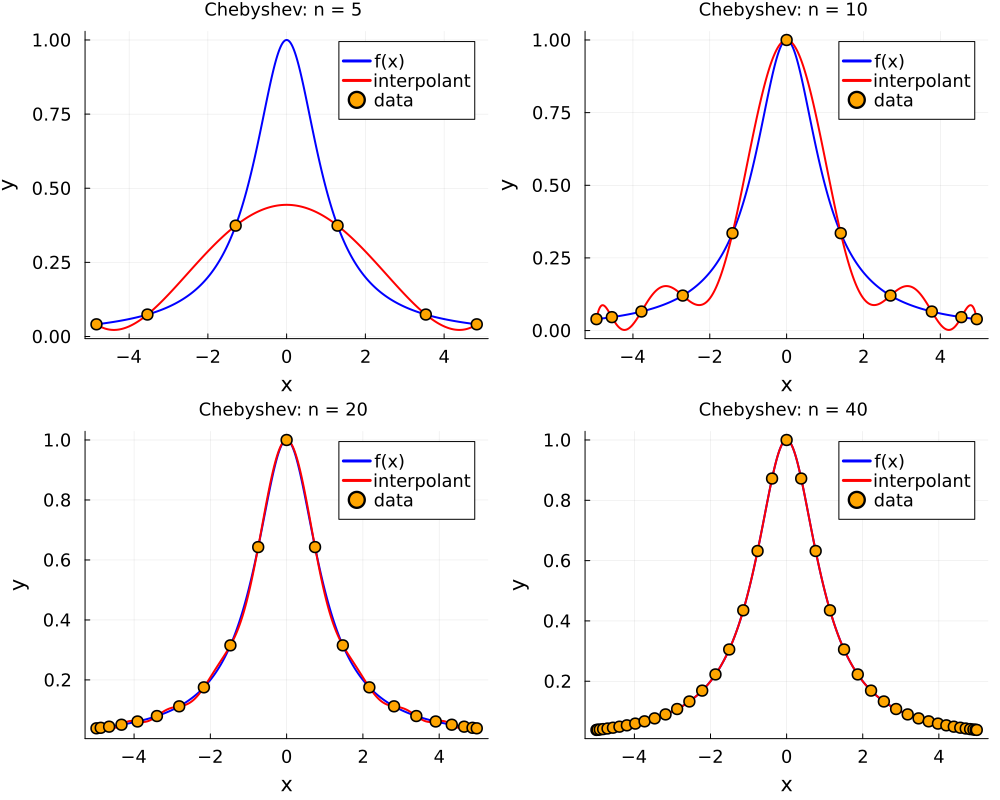

In [8]:
n = 5
x_nodes = []

for j in 0:n
    node = getChebyshevNode(n, j)
    push!(x_nodes, node)
end

for node in x_nodes
    println(node)
end

n_values = [5, 10, 20, 40]
plots_array = []

for n in n_values
    x_nodes = sort([5 * cos((2j+1) * pi / (2n+2)) for j in 0:n])
    y_nodes = f.(x_nodes)
    p = LagrangeInterpolation(y_nodes, x_nodes)

    xx = LinRange(minimum(x_nodes), maximum(x_nodes), 1000)
    plt = plot(xx, f.(xx), label="f(x)", linewidth=2, color=:blue)
    plot!(plt, xx, p.(xx), label="interpolant", linewidth=2, color=:red)
    scatter!(plt, x_nodes, y_nodes, label="data", color=:orange)
    xlabel!(plt, "x")
    ylabel!(plt, "y")
    title!(plt, "Chebyshev: n = $n ")
    
    push!(plots_array, plt)
end

plot(plots_array..., layout=(2,2), size=(1000,800))



## 3. Guassian Quadrature

In [9]:
Pkg.add("Polynomials")

using LinearAlgebra
using Polynomials

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [10]:
using Polynomials
using QuadGK

P5 = Polynomial([0, 5/21, 0, -10/9, 0, 1])
x_gauss = sort(roots(P5))

function legendreWeight(i, nodes)
    product = Polynomial([1.0])
    for j in nodes
        if j != i
            product *= Polynomial([-j, 1.0]) / (i - j)
        end
    end

    coefficients = coeffs(product)
    # integral = sum(coefficients[k+1]/(k+1) * (1^(k+1) - (-1)^(k+1)) for k in 0:(length(coefficients)-1))
    integral, _ = quadgk(x -> product(x), -1, 1)
    return integral
end

c_gauss = [legendreWeight(i, x_gauss) for i in x_gauss]

for (xi, wi) in zip(x_gauss, c_gauss)
    println("Node: $(xi), Weight: $(wi)")
end


Node: -0.9061798459386644, Weight: 0.23692688505618864
Node: -0.5384693101056832, Weight: 0.4786286704993672
Node: 0.0, Weight: 0.5688888888888886
Node: 0.5384693101056831, Weight: 0.47862867049936575
Node: 0.9061798459386636, Weight: 0.2369268850561894


gaussian quadrature


In [11]:
using Polynomials

# Gaussian quadrature nodes and weights from Part A/B (n = 5)
P5 = Polynomial([0, 5/21, 0, -10/9, 0, 1])
x_gauss = sort(roots(P5))
c_gauss = [legendreWeight(xi, x_gauss) for xi in x_gauss]

# Integration interval
a, b = 0.0, pi/4

# Rescale nodes and weights for [0, π/4]
x_scaled = (b-a)/2 .* x_gauss .+ (b+a)/2
w_scaled = (b-a)/2 .* c_gauss

# Define the function
f(x) = cos(x)^2

# Approximate the integral
approx_integral = sum(w_scaled[i] * f(x_scaled[i]) for i in 1:length(x_scaled))
println("Gaussian Quadrature Approximation: ", approx_integral)

# Exact integral
exact_integral = pi/8 + 1/4  # ≈ 0.64269908
abs_error = abs(exact_integral - approx_integral)
println("Absolute Error: ", abs_error)


Gaussian Quadrature Approximation: 0.6426990817086152
Absolute Error: 9.891087948687982e-12


approximating the integral of cos^2(x)

In [12]:
function compute_simps(h, f_nodes)
    ∫f = 0;
    n = length(f_nodes)-1;
    for j in 1:n÷2
        # add 1 because Julia indices start at 1, not 0
        ∫f += h/3 * (f_nodes[2*j-2+1]+ 4*f_nodes[2*j-1+1]  +f_nodes[2*j+1] );
    end
    return ∫f
end

compute_simps (generic function with 1 method)

In [13]:
function compute_trapz(h, f_nodes)
    ∫f = 0;
    for j in 1:length(f_nodes)-1
        ∫f += h/2 * (f_nodes[j]+ f_nodes[j+1]);
    end
    return ∫f
end

compute_trapz (generic function with 1 method)

In [14]:
pdf(x) = 1/sqrt(2*pi) * exp(-x^2/2)

function F_comp_simpsons(x, n)
    t_nodes = LinRange(0, x, n+1)
    f_nodes = pdf.(t_nodes)
    h = t_nodes[2] - t_nodes[1]
    integral = compute_simps(h, f_nodes)
    F = 0.5 + integral
    Fp = pdf(x)
    return F, Fp
end

x_test = 0.9
F_val, Fp_val = F_comp_simpsons(x_test, 64)

F_exact = cdf(Normal(0,1), x_test)
abs_error = abs(F_val - F_exact)

println("F($x_test) = $F_val")
println("F'($x_test) = $Fp_val")
println("Absolute Error = $abs_error")


LoadError: UndefVarError: `cdf` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

Using Newton’s method with F comp simpsons

In [ ]:
function invF(p)
    x = 0.5
    
    while true
        F_val, Fp_val = F_comp_simpsons(abs(x), 64)
        F_val = x >= 0 ? F_val : 1 - F_val
        
        x_new = x - (F_val - p) / Fp_val
        
        if abs(x_new - x) < 1e-8
            return x_new
        end
        
        x = x_new
    end
end


invF (generic function with 1 method)

In [ ]:
percentiles = [0.6, 0.7, 0.8, 0.9]

for p in percentiles
    val = invF(p)
    println(Int(p*100), "th percentile: ", val)
end


60th percentile: 0.253347103134785
70th percentile: 0.5244005126722552
80th percentile: 0.8416212332524516
90th percentile: 1.28155156399047


In [ ]:
using QuadGK
using Roots
using Distributions

pdf(x) = 1 / sqrt(2*pi) * exp(-x^2/2)

function quad(x)
    integral, _ = quadgk(t -> pdf(t), 0, x)
    return 0.5 + integral
end

function invF_root(p)
    f(x) = quad(x) - p
    return find_zero(f, 0.5)
end

percentiles = [0.6, 0.7, 0.8, 0.9]

for p in percentiles
    estimate = invF_root(p)
    exact = quantile(Normal(0,1), p)
    abs_err = abs(estimate - exact)
    println("$(p*100)%: approx = $estimate, exact = $exact, abs error = $abs_err")
end


60.0%: approx = 0.2533471031357998, exact = 0.2533471031357997, abs error = 5.551115123125783e-17
70.0%: approx = 0.5244005127080408, exact = 0.5244005127080407, abs error = 1.1102230246251565e-16
80.0%: approx = 0.8416212335729145, exact = 0.8416212335729144, abs error = 1.1102230246251565e-16
90.0%: approx = 1.2815515655446004, exact = 1.2815515655446006, abs error = 2.220446049250313e-16
